# DATA COLLECTION 🐕

In [1]:
import pandas as pd
pd.read_csv('emotion_labels_test.csv')

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy
...,...,...
3137,Why does Candice constantly pout #GBBO 💄😒,sadness
3138,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness
3139,"@AceOperative789 no pull him afew weeks ago, s...",sadness
3140,I'm buying art supplies and I'm debating how s...,sadness


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('emotion_labels_test.csv')
df.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [4]:
print(df.isnull().sum())
print(df.duplicated().sum())

text     0
label    0
dtype: int64
0


In [5]:
df.label.unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

df['updated_label'] = df['label'].map({
    "joy" : 0,
    "fear" : 1,
    "anger" : 2,
    "sadness" : 3
})

df.updated_label.unique()

array([0, 1, 2, 3])

In [7]:
df['label'].value_counts()

fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

In [8]:
df['updated_label'].value_counts()

1    995
2    760
0    714
3    673
Name: updated_label, dtype: int64

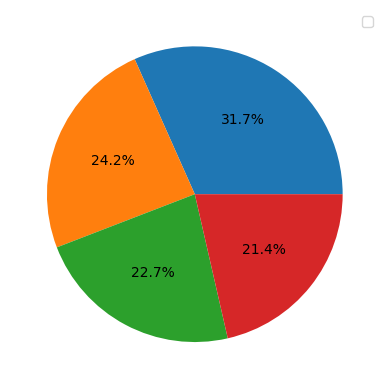

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_pie = df['label'].value_counts()
labels = {'joy', 'fear', 'anger', 'sadness'}
plt.pie(x=plot_pie, autopct='%1.1f%%')
plt.legend()
plt.show()

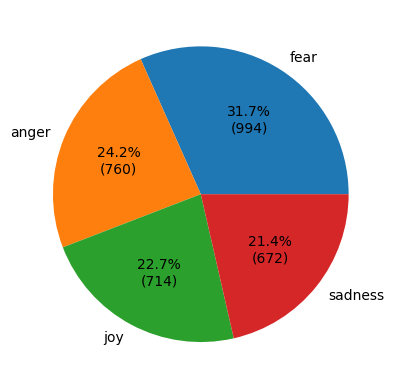

In [10]:
import matplotlib.pyplot as plt

plot_pie = df['label'].value_counts()
labels = ['fear', 'anger', 'joy', 'sadness']

def autopct_format(pct):
    # Calculate count and label for each slice
    absolute = int(pct/100.*plot_pie.sum())
    category = labels[int(pct/100.*len(labels))]
    return "{:.1f}%\n({:d})".format(pct, absolute, category)

plt.pie(x=plot_pie, labels=labels, autopct=autopct_format)
plt.show()


# DATA PREPROCESSING 😶

In [11]:
import nltk
# from nltk.tokenize import word_tokenize: Specifically imports the word_tokenize function from NLTK, which is used to tokenize sentences into words.
from nltk.tokenize import word_tokenize
# Imports NLTK's list of stopwords, which are common words (like "the", "is", "and", etc.) that are often removed from text data during preprocessing.
from nltk.corpus import stopwords
# Imports the WordNet Lemmatizer from NLTK, which is used for lemmatizing words (reducing them to their base or dictionary form).
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re

In [12]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
steamer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
def preprocess_text(text):

    text = text.lower()
    text = re.sub(r"[#@$]" , " " , text)
    text = re.sub("[^\w\s]" , " " , text) # combine punctuation
    text = word_tokenize(text) # Tokenize # simple word split
    text = [word for word in text if word not in stop_words] # remove stopword "the am"
    text = [steamer.stem(i) for i in text]
    return " ".join(text)

In [14]:
text = "Hello, this is an example text with punctuation, @special characters, and stopwords."

cleaned_text = preprocess_text(text)

print("ORIGINAL_TEXT : ",text)
print("*"*35)
print("AFTER PREPROCESS : ",cleaned_text)

ORIGINAL_TEXT :  Hello, this is an example text with punctuation, @special characters, and stopwords.
***********************************
AFTER PREPROCESS :  hello exampl text punctuat special charact stopword


In [15]:
df.head()

,text,label,updated_label
0,You must be knowing #blithe means (adj.) Happ...,joy,0
1,Old saying 'A #smile shared is one gained for ...,joy,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0
3,@Elaminova sparkling water makes your life spa...,joy,0
4,I'm tired of everybody telling me to chill out...,joy,0


In [16]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,text,label,updated_label,cleaned_text
0,You must be knowing #blithe means (adj.) Happ...,joy,0,must know blith mean adj happi cheer
1,Old saying 'A #smile shared is one gained for ...,joy,0,old say smile share one gain anoth day yeglif ...
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0,bridget jone babi bloodi hilari bridgetjonesbabi
3,@Elaminova sparkling water makes your life spa...,joy,0,elaminova sparkl water make life sparkli
4,I'm tired of everybody telling me to chill out...,joy,0,tire everybodi tell chill everyth ok fuck tire...


# FEATURE EXTRACTION 🎆

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [18]:
X = df['cleaned_text']
y = df['updated_label']

tf_tdf = TfidfVectorizer()
X = tf_tdf.fit_transform(X).toarray()

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(2513, 7540)
(629, 7540)


In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Selection 🫂

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [21]:
model_list = {
    "SVC" : SVC(),
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

In [22]:
model_list.items()

dict_items([('SVC', SVC()), ('LogisticRegression', LogisticRegression()), ('RandomForestClassifier', RandomForestClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [23]:
for name , model in model_list.items():

    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print("Model Name : ",name)
    print("SCORE : ",accuracy_score(y_test,y_pred))

Model Name :  SVC
SCORE :  0.7980922098569158
Model Name :  LogisticRegression
SCORE :  0.8314785373608903
Model Name :  RandomForestClassifier
SCORE :  0.8394276629570747
Model Name :  DecisionTreeClassifier
SCORE :  0.8171701112877583


In [24]:
first_model = model_list['SVC']

y_pred_scv = first_model.predict(X_test)
confusion_matrix(y_test,y_pred_scv)

array([[133,  27,   4,   3],
       [  1, 188,   3,   9],
       [  3,  18, 112,   6],
       [  3,  37,  13,  69]])

In [25]:
error = abs(y_test - y_pred_scv)
accuracy = accuracy_score(y_test, y_pred_scv)

print("Mean Absolute Error:", error.mean())
print("Accuracy:", accuracy)

Mean Absolute Error: 0.3052464228934817
Accuracy: 0.7980922098569158


In [26]:
abs(y_pred_scv - y_test).mean()

0.3052464228934817

In [27]:
model_list

{'SVC': SVC(),
 'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier()}

In [28]:
models = list(model_list.items()) # Votingclf what list in estimators

In [29]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=models , voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('SVC', SVC()),
                             ('LogisticRegression', LogisticRegression()),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier())])

In [30]:
v_y_pred = voting_clf.predict(X_test)
voting_clf_error = abs(y_test - v_y_pred).mean()
print("ERROR : ",voting_clf_error)

ERROR :  0.27821939586645467


In [31]:
print("Accuracy : " , accuracy_score(y_test,v_y_pred)*100)

Accuracy :  81.08108108108108


In [32]:
custom_mapping = {
    "joy" : 0,
    "fear" : 1,
    "anger" : 2,
    "sadness" : 3
}

In [33]:
df['text'][2]

"Bridget Jones' Baby was bloody hilarious 😅 #BridgetJonesBaby"

In [34]:
df['label'][2]

'joy'

In [35]:
lr_model = model_list['LogisticRegression']

In [36]:
data = "Bridget Jones' Baby was bloody hilarious 😅 #BridgetJonesBaby"
data = preprocess_text(data)
data = tf_tdf.transform([data])
result = lr_model.predict(data)[0]
print("Data In TF-IDF vectorizer : ")
print(data)
print("Result = " , result)

Data In TF-IDF vectorizer : 
  (0, 3542)	0.4648181556883267
  (0, 3014)	0.2955375869284916
  (0, 949)	0.44227361364049655
  (0, 947)	0.4648181556883267
  (0, 845)	0.4037334644513832
  (0, 591)	0.34919770812098677
Result =  0


In [62]:
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag'],
    'class_weight': [None, 'balanced']
}

lr_clf = GridSearchCV(lr_model , param_grid=lr_param_grid , cv=3 ,scoring='accuracy')
lr_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='accuracy')

In [37]:
#print('BEST-PARAM-LOGISTIC-REGRESSION = ',lr_clf.best_params_)

model_lr = LogisticRegression(C=10 , class_weight='balanced' , penalty = "l1" , solver = "liblinear")
model_lr.fit(X_train,y_train)

y_pred = model_lr.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("LOGISTIC-MODEL-ACCURACY-USING-HYPER-TUNNING : ",score)

LOGISTIC-MODEL-ACCURACY-USING-HYPER-TUNNING :  0.8680445151033387


In [65]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']
}
dt_model = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt_model , param_grid=dt_param_grid , cv=3 , scoring='accuracy')

In [70]:
dt_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [71]:
dt_clf.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [73]:
model_dt = DecisionTreeClassifier(class_weight='balanced' , criterion='gini', max_depth=None , max_features='sqrt',
                                  min_samples_leaf=1 , min_samples_split=10 , splitter='best')
model_dt

DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_split=10)

In [75]:
model_dt.fit(X_train,y_train)
dt_y_pred = model_dt.predict(X_test)
dt_score = accuracy_score(y_test,dt_y_pred)
print('DECISION-TREE-CLASSIFIER-MODEL-ACCURACY-WITH-HYPER-TUNNING = ',dt_score)

DECISION-TREE-CLASSIFIER-MODEL-ACCURACY-WITH-HYPER-TUNNING =  0.7583465818759937


In [66]:
import joblib

In [67]:
joblib.dump(model_lr , "model.joblib")

['model.joblib']

In [90]:
voting_list_model = {
    "lr" : model_lr,
    "dt" : model_dt,
    "Rf" : RandomForestClassifier()
}

In [91]:
voting_list_model.items()

dict_items([('lr', LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                   solver='liblinear')), ('dt', DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_split=10)), ('Rf', RandomForestClassifier())])

In [92]:
v_model_list = list(voting_list_model.items())
v_model_list

[('lr',
  LogisticRegression(C=10, class_weight='balanced', penalty='l1',
                     solver='liblinear')),
 ('dt',
  DecisionTreeClassifier(class_weight='balanced', max_features='sqrt',
                         min_samples_split=10)),
 ('Rf', RandomForestClassifier())]

In [96]:
voting_clf = VotingClassifier(estimators=v_model_list , voting='soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, class_weight='balanced',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_features='sqrt',
                                                     min_samples_split=10)),
                             ('Rf', RandomForestClassifier())],
                 voting='soft')

In [97]:
voting_y_pred = voting_clf.predict(X_test)
score_v = accuracy_score(y_test,voting_y_pred)
print("VOTING_CLF-ACCURACY = ",score_v*100)

VOTING_CLF-ACCURACY =  83.6248012718601


In [89]:
# voting ='soft' = 77.90
# voting = 'hard' = 81.55